C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


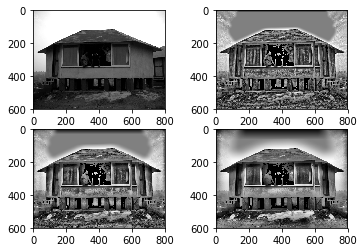

In [56]:
import numpy as np
from scipy.misc import *
import matplotlib.pyplot as plt
import math

def AHE(img, win_size):
    
    # (1) pre-requirement Padding
    s=int((win_size-1)/2)
    (n1,n2)=img.shape
    img_pad=np.zeros((n1+2*s,n2+2*s))
    img_pad[s:s+n1, s:s+n2]=img[:,:]
    for i in range (0,s-1):
        img_pad[i,s:s+n2]=img[s-i-1,:]
    for i in range (s+n1+1,2*s+n1):
        img_pad[i,s:s+n2]=img[n1-1-i, :]
    for j in range (0,s-1):
        img_pad[0:2*s+n1,j]=img_pad[0:2*s+n1,2*s-j-1]
    for j in range (s+n1+1,2*s+n2):
        img_pad[0:2*s+n1,j]=img_pad[0:2*s+n1,2*s+n2-j]
    #return img_pad
    
    # (2) AHE operation
    output=np.zeros((n1,n2))
    for x in range (s,s+n1):
        for y in range (s,s+n2):
            rank=0
            for i in range (-s,s+1):
                for j in range (-s,s+1):
                    if img_pad[x,y]>img_pad[x+i,y+j]:
                        rank=rank+1
            img_pad[x,y]=(rank*255)/(win_size**2)
    output[:,:]=img_pad[s:s+n1, s:s+n2]
    return output
    


#Import image here
#Sample call
#Plotting code below
'''
Your code here
'''
pic=imread('beach.png')
plt.subplot(2,2,1)
plt.imshow(pic, cmap='gray')
win_size=33
pic_AHE_33=AHE(pic,win_size)
plt.subplot(2,2,2)
plt.imshow(pic_AHE_33, cmap='gray')
imsave('beach_AHE_33.png',pic_AHE_33)
win_size=65
pic_AHE_65=AHE(pic,win_size)
plt.subplot(2,2,3)
plt.imshow(pic_AHE_65, cmap='gray')
imsave('beach_AHE_65.png',pic_AHE_33)
win_size=129
pic_AHE_129=AHE(pic,win_size)
plt.subplot(2,2,4)
plt.imshow(pic_AHE_129, cmap='gray')
imsave('beach_AHE_129.png',pic_AHE_129)
plt.show()
